# Assignment 4

This assignment has you make use of the CMU Pronouncing Dictionary (CMUdict) to investigate the relationship between vowels in written American English and their pronunciation. We will do this by making a conditional frequency distribution between vowel characters in the word orthography and phonological segments in the pronunciation.

**Note 1:** This assignment has lots of reading and analysis but relatively little code, but be sure to run all the given code blocks below.

**Note 2:** This assignment will make use of the following terminology:
* *span*: a substring of characters sharing some property; e.g., `uou` is a vowel span in `contiguous`
* *segment*: a phonological unit in the ARPABET transcription scheme (described below)

#### ARPABET

CMUdict uses the [ARPABET](https://en.wikipedia.org/wiki/ARPABET) transcription scheme (rather than, for example, [IPA](https://en.wikipedia.org/wiki/International_Phonetic_Alphabet)). ARPABET can be imprecise at times, but nevertheless it will serve as a useful approximation. The ARPABET vowels and consonants are:

**Vowels:** AA AE AH AO AW AX AXR AY EH ER EY IH IX IY OW OY UH UW UX

**Consonants:** B CH D DH DX EL EM EN F G H HH JH K L M N NX NG P Q R S SH T TH V W WH Y Z ZH

CMUdict then pairs each word it covers with one or more transcriptions using these segments. Vowel segments additionally have a number 0--3 indicating the stress pattern. For example, the word "go" is paired with `['G', 'OW1']`.

# Part 1: Pairing Vowel Spans with Phonological Segments (4 points)

It is not easy to accurately map all vowels in the orthography to all vowel segments in the pronunciation. Consider the following entries:

In [42]:
# some have a 1-to-1 mapping between vowels and phonological vowel segments:
#     go     >  o: OW1
#     banana >  a: AH0  a: AE1  a: AH0
go = ('go', ['G', 'OW1'])
banana = ('banana', ['B', 'AH0', 'N', 'AE1', 'N', 'AH0'])

# sometimes contiguous vowels map to a single segment:
#     train     >  a + i: EY1
#     beautiful >  e + a + u: UW1  i: AH0  u: AH0
train = ('train', ['T', 'R', 'EY1', 'N'])
beautiful = ('beautiful', ['B', 'Y', 'UW1', 'T', 'AH0', 'F', 'AH0', 'L'])

# sometimes orthographic vowels are not phonologically realized:
#     phone >  o: OW1  e: ---
phone = ('phone', ['F', 'OW1', 'N'])

# sometimes contiguous vowels map to multiple segments:
#     ion >  i: AY1  o: AA2
ion = ('ion', ['AY1', 'AA2', 'N'])

In order to make the task easier we will approximate a mapping with the following simplifications:

* Vowel spans are always the longest contiguous substrings of vowel characters
* Vowel spans always map to a single segment (e.g., `eau` from *beautiful* maps to `UW1`)
* If there is not a 1-to-1 mapping between vowel spans and vowel segments, the entry is ignored (e.g., *ion* has one span `io` and two segments `['AY1', 'AA2']`, so nothing is mapped for this entry)
* To reduce data sparsity, stress information is removed from vowels (e.g., `EY1` becomes `EY`).

Below are some functions to help with this task:

In [2]:
import itertools  # in the standard library: https://docs.python.org/3/library/itertools


def is_vowel(c):
    """Return True if *c* is a vowel character (including y)."""
    return c in 'aeiouy'


def vowel_spans(s):
    """Return the longest contiguous substrings of vowel characters in string *s*."""
    spans = []
    for key, group in itertools.groupby(s, key=is_vowel):
        if key:
            spans.append(''.join(group))
    return spans


# ARPABET vowel segments
VOWELS = set('AA AE AH AO AW AX AXR AY EH ER EY IH IX IY OW OY UH UW UX'.split())


def vowel_segments(p):
    """Return the phonological vowel segments in pronunciation *p* with stress removed."""
    destressed = [seg.rstrip('0123') for seg in p]
    return [seg for seg in destressed if seg in VOWELS]


# Make sure the above work as expected (using the pairs defined above):

assert is_vowel('a')
assert not is_vowel('x')

assert vowel_spans(banana[0]) == ['a', 'a', 'a']
assert vowel_spans(beautiful[0]) == ['eau', 'i', 'u']
assert vowel_spans(ion[0]) == ['io']

assert vowel_segments(banana[1]) == ['AH', 'AE', 'AH']
assert vowel_segments(beautiful[1]) == ['UW', 'AH', 'AH']
assert vowel_segments(ion[1]) == ['AY', 'AA']
print('All tests passed!')

All tests passed!


Here you should write the `vowel_pairs()` function that takes a list of CMUdict `(orth, phon)` entries and returns a list of all `(vowel_span, phon_segment)` pairs that are found. You should use the `vowel_spans()` and `vowel_segments()` functions defined above to help you. Only attempt to pair those where the number of vowel spans and segments are the same. The function will return a list accumulating all pairs found in the given entries (see the tests below for examples). You may find Python's [zip()](https://docs.python.org/3/library/functions.html#zip) function useful.

In [101]:
def vowel_pairs(entries):
    """
    Return a list of pairings of vowel characters and vowel pronunciation segments.
    
    *entries* is a list of (orthography, phonology) pairs, where the orthography
    is a word (a string) and the phonology is a list of ARPABET segments. E.g.::
    
        ('word', ['W', 'ER1', 'D'])

    For each entry, if the vowel spans of the orthography and vowel segments of
    the phonology have the same length, they are paired. In the end, the function
    returns the list of all pairs it finds in *entries*.
    """
    pairs = []
    for entry in entries:
        orth = vowel_spans(entry[0])
        phon = vowel_segments(entry[1])
        if len(orth) == len(phon):
            pairs.extend(zip(orth, phon)) #this method is slower
            #or pairs += zip(orth, phon)
    return pairs 
    raise NotImplementedError()

In [102]:
assert vowel_pairs([go]) == [('o', 'OW')]
assert vowel_pairs([train]) == [('ai', 'EY')]
assert vowel_pairs([banana]) == [('a', 'AH'), ('a', 'AE'), ('a', 'AH')]
assert vowel_pairs([beautiful]) == [('eau', 'UW'), ('i', 'AH'), ('u', 'AH')]
assert vowel_pairs([phone]) == []
assert vowel_pairs([ion]) == []
assert vowel_pairs([go, phone, train]) == [('o', 'OW'), ('ai', 'EY')]
print('All tests passed!')

All tests passed!


## Part 2: Building a Conditional Frequency Distribution (1 point)

Now you will use the `vowel_pairs()` function to build a conditional frequency distribution between vowel spans in the orthography and vowel segments in the pronunciation. For this you will use [nltk.ConditionalFreqDist](https://www.nltk.org/book/ch02.html#sec-conditional-frequency-distributions) (review the reading or previous lectures if necessary). The condition will be the vowel spans and the frequency distributions will be over the phonological segments.

First let's import CMUdict and see how many of its entries are usable with our simplified pairing method:

In [62]:
from nltk.corpus import cmudict

num_paired = len([(orth, phon) for orth, phon in cmudict.entries()
                  if len(vowel_spans(orth)) == len(vowel_segments(phon))])

num_entries = len(cmudict.entries())

print('{:,} ({:.2%}) of {:,} entries can pair vowel characters to vowel phonology'
      .format(num_paired, (num_paired / num_entries), num_entries))

104,335 (78.02%) of 133,737 entries can pair vowel characters to vowel phonology


That should be enough to create a useful model, even if it contains some noise.

Now use the `vowel_pairs()` function with `cmudict.entries()` to create a conditional frequency distribution and assign it to a variable named `vowel_cfd`.

**NOTE:** If you did not complete Part 1 or if it doesn't pass the tests, just create an empty `ConditionalFreqDist`.

In [1]:
import nltk

pairs2 = vowel_pairs(cmudict.entries())                                             
vowel_cfd = nltk.ConditionalFreqDist(pairs2)
raise NotImplementedError()

#vowel_cfd = nltk.ConditionalFreqDist(vowel_pairs(cmudict.entries())) #correct answer!

NameError: name 'vowel_pairs' is not defined

In [179]:
# just check if the object exists and is the right type
assert isinstance(vowel_cfd, nltk.ConditionalFreqDist)
print('All tests passed!')

All tests passed!


## Part 3: Analysis (5 points)

Now you will inspect the conditional frequency distribution to find patterns and answer some questions.

**Note:** If you were unable to create the conditional frequency distribution, run the following cell. It will load one that I have precomputed so you can continue with the assignment.

In [103]:
# Run this if you wish to use a precomputed ConditionalFreqDist

data = {"a": {"AH": 18661, "EY": 4568, "AA": 10960, "AE": 17312, "ER": 1438, "IH": 187, "AO": 1707, "EH": 910, "AY": 44, "OW": 10, "IY": 5, "UW": 3, "AW": 8, "OY": 3, "UH": 2}, "aa": {"AA": 179, "EH": 5, "AH": 7, "AE": 4, "IH": 3, "EY": 2}, "e": {"ER": 17004, "AH": 11824, "EH": 19227, "IY": 3294, "IH": 7304, "EY": 1194, "AY": 117, "AA": 61, "UW": 564, "AE": 43, "OW": 70, "AO": 27, "UH": 8, "OY": 1}, "o": {"AH": 7679, "AO": 5487, "OW": 12403, "AW": 741, "ER": 2324, "AA": 8336, "IH": 68, "UW": 94, "UH": 57, "AE": 10, "EH": 4, "IY": 10, "OY": 22, "EY": 1, "AY": 1}, "i": {"IY": 5883, "IH": 30030, "AH": 3893, "AY": 3145, "ER": 676, "EY": 10, "OW": 7, "AE": 51, "AA": 17, "AO": 24, "EH": 16, "UW": 3}, "u": {"AH": 8339, "UW": 3824, "ER": 1776, "UH": 752, "AO": 32, "EH": 64, "IH": 89, "AA": 3, "AE": 1, "AW": 1, "AY": 1, "EY": 1}, "ie": {"IY": 2671, "AH": 106, "AY": 277, "IH": 205, "EH": 67, "ER": 81, "UW": 63, "EY": 11}, "ai": {"EH": 296, "EY": 1206, "AY": 186, "AA": 3, "AH": 72, "IH": 19, "ER": 11, "AE": 5, "IY": 1, "OY": 1, "AO": 1}, "au": {"AW": 469, "AA": 109, "AO": 1025, "OW": 113, "AH": 20, "AE": 20, "ER": 9, "EY": 4}, "ey": {"IY": 1850, "EY": 167, "IH": 4, "AY": 6, "EH": 9}, "ou": {"UW": 403, "AW": 1325, "ER": 92, "AH": 376, "AA": 14, "AO": 170, "OW": 98, "UH": 95, "IH": 3}, "ia": {"IY": 174, "AH": 692, "AY": 55, "AA": 55, "ER": 31, "IH": 27, "AE": 17, "AO": 14, "EH": 4, "EY": 3}, "y": {"IY": 5749, "IH": 979, "AY": 825, "AH": 113, "ER": 28, "EH": 3, "AA": 2, "OW": 5, "EY": 2}, "io": {"AH": 2503, "ER": 24, "AY": 48, "IY": 35, "OW": 50, "AO": 17, "AA": 2, "UW": 1, "IH": 18, "EH": 1, "AW": 1}, "ee": {"IY": 1976, "IH": 146, "AH": 6, "EY": 13, "EH": 2, "ER": 1}, "eya": {"EY": 2, "AA": 2, "ER": 2}, "ae": {"EY": 75, "EH": 127, "IY": 38, "AE": 21, "ER": 3, "AH": 15, "AY": 14, "AA": 7, "IH": 1}, "uiu": {"UW": 1}, "oo": {"UW": 1024, "UH": 791, "AO": 33, "AH": 40, "OW": 12, "AA": 3, "IH": 3, "ER": 2}, "oa": {"AO": 160, "OW": 457, "ER": 4, "AA": 8}, "ea": {"EH": 570, "AH": 121, "ER": 135, "IY": 1586, "IH": 181, "EY": 71, "AA": 55, "AE": 7, "AO": 6}, "eu": {"UW": 237, "ER": 56, "UH": 49, "AY": 1, "OY": 70, "AH": 15, "OW": 9, "EH": 1, "IY": 5, "AO": 1}, "ue": {"EH": 239, "UW": 384, "ER": 46, "IY": 7, "UH": 87, "AH": 56, "EY": 54, "IH": 16, "AE": 1, "AO": 11, "OW": 1, "AA": 3}, "ua": {"UW": 46, "AA": 225, "AH": 101, "EY": 28, "EH": 16, "AE": 17, "ER": 3, "AO": 63, "IH": 1}, "ay": {"EY": 946, "AY": 9, "IY": 40, "EH": 1, "IH": 1}, "oy": {"OY": 277, "AO": 3}, "uai": {"EY": 13, "AY": 1, "AH": 1, "IY": 1}, "uie": {"IY": 7, "IH": 2, "UW": 1}, "ui": {"AY": 33, "AH": 61, "IH": 402, "IY": 110, "UW": 109, "AE": 2, "UH": 4, "ER": 16, "AO": 1}, "ei": {"IY": 419, "AY": 1442, "EY": 215, "EH": 38, "AH": 29, "IH": 43, "ER": 1}, "aue": {"AW": 18, "UW": 1}, "oi": {"OY": 468, "AA": 49, "AH": 8, "AY": 1, "OW": 14, "AO": 1, "UW": 3, "IH": 1}, "ieu": {"UW": 12, "UH": 2, "AH": 2, "ER": 3}, "eou": {"AH": 19, "AW": 13, "IH": 1, "AO": 1, "OW": 2}, "ya": {"AH": 61, "AA": 139, "IY": 8, "AY": 9, "AW": 1, "AE": 77, "ER": 6, "EY": 5, "AO": 6, "EH": 3}, "aie": {"AY": 3, "EY": 1, "IY": 1}, "ao": {"AA": 1, "AW": 59, "OW": 7, "AH": 1, "AO": 4, "EY": 2}, "aye": {"EY": 63, "AY": 3, "EH": 4, "IY": 1, "ER": 3}, "oe": {"OW": 535, "IY": 11, "AO": 51, "EY": 1, "UW": 21, "AH": 6, "IH": 1, "EH": 4, "AA": 11, "ER": 4}, "iu": {"AH": 18, "IH": 4, "UW": 21, "IY": 2, "AY": 2}, "ye": {"EH": 74, "AY": 41, "ER": 26, "IY": 11, "AH": 3, "EY": 4, "IH": 1, "UW": 2}, "iou": {"AH": 110, "IY": 1, "IH": 13, "OW": 1, "UW": 2}, "oya": {"OY": 8}, "oye": {"OY": 28}, "eo": {"OW": 19, "IY": 77, "IH": 19, "AH": 26, "EH": 28, "AO": 24, "AW": 1, "EY": 1}, "yo": {"IY": 5, "OW": 78, "AO": 36, "AH": 15, "AY": 2, "AA": 22, "AW": 1}, "eau": {"OW": 240, "AO": 2, "UW": 7, "AA": 3, "AH": 3, "AW": 3, "IY": 2}, "ii": {"IY": 14}, "uou": {"AH": 11}, "oeu": {"OW": 1, "UW": 2, "ER": 2, "AH": 2}, "ayo": {"EY": 4}, "ooe": {"UW": 6}, "uo": {"OW": 43, "AA": 4, "AO": 19, "UH": 9, "UW": 4, "ER": 2, "AH": 1, "AW": 1}, "yu": {"UW": 46, "AH": 34, "IY": 1, "UH": 6, "ER": 7}, "eai": {"IH": 1}, "eie": {"AY": 8}, "eui": {"IY": 1, "UW": 1}, "uea": {"IY": 15}, "eye": {"AY": 75, "IY": 8, "EY": 8, "ER": 1, "EH": 2}, "yi": {"IY": 17, "AY": 1, "IH": 16}, "oua": {"AE": 1, "AW": 1, "UW": 1, "AA": 2}, "oui": {"IY": 13, "AH": 1, "UW": 5, "ER": 1}, "oie": {"OY": 4, "AA": 4}, "eoi": {"AA": 3, "IH": 1}, "ouy": {"OY": 2}, "uu": {"UW": 9, "UH": 1}, "uye": {"UW": 1, "AY": 1, "ER": 2}, "uy": {"UW": 3, "AY": 33, "IY": 5, "OY": 1}, "oue": {"UW": 6, "EH": 1, "AH": 3, "AA": 2}, "uey": {"EY": 2}, "aoue": {"EY": 1}, "uay": {"EY": 10, "IY": 1, "AY": 2}, "iao": {"AW": 8}, "aey": {"EY": 1}, "oau": {"OW": 1}, "you": {"UW": 17, "AO": 8, "UH": 5, "OW": 1, "AW": 6, "AH": 28, "ER": 2}, "oyo": {"AY": 2}, "aou": {"AW": 2}, "yee": {"IY": 2}, "yea": {"ER": 13, "EH": 2, "IH": 23, "IY": 21, "EY": 5, "AH": 1, "AE": 1}, "uei": {"AH": 1, "EH": 4, "ER": 1}, "aya": {"EY": 2}, "eea": {"AH": 2}, "eei": {"IH": 1}, "iai": {"EY": 2}, "aeu": {"AW": 4}, "yeu": {"UW": 3}, "yie": {"IY": 8, "AY": 1}, "uoi": {"OY": 1}, "eeu": {"UW": 3}, "ueu": {"ER": 3, "UW": 1}, "uee": {"IY": 17, "IH": 3}, "oai": {"OW": 1}, "yay": {"AY": 1, "EY": 1}, "eue": {"UW": 1}, "eyea": {"IH": 1}, "ooo": {"UW": 2, "OW": 1}, "aiu": {"AY": 1}, "eay": {"IY": 1, "EY": 2}, "ayu": {"IY": 1}, "eaue": {"OW": 1}, "uaye": {"EY": 2}, "ueau": {"OW": 1}, "ueue": {"UW": 2}, "ayi": {"IH": 1}, "yaa": {"AA": 1}, "yae": {"IY": 1}, "yao": {"AW": 3}, "yau": {"OW": 1, "AO": 5}, "yei": {"EH": 1, "IY": 2}, "yeo": {"OW": 4}, "yoa": {"OW": 4}, "yoe": {"OW": 2, "EH": 1, "AO": 1}, "yoo": {"UW": 5}, "yoy": {"OY": 1}, "yue": {"UW": 1, "EH": 1}, "yui": {"UW": 2}}
# This creates an empty ConditionalFreqDist, then populates it directly
vowel_cfd = nltk.ConditionalFreqDist()
for condition in data:
    vowel_cfd[condition] = nltk.FreqDist()
    vowel_cfd[condition].update(data[condition])

First let's see how many conditions (orthographic vowel spans) there are, and what they are:

In [104]:
print('There are {} unique vowel spans:'.format(len(vowel_cfd.conditions())))
print(vowel_cfd.conditions())

There are 117 unique vowel spans:
['a', 'aa', 'e', 'o', 'i', 'u', 'ie', 'ai', 'au', 'ey', 'ou', 'ia', 'y', 'io', 'ee', 'eya', 'ae', 'uiu', 'oo', 'oa', 'ea', 'eu', 'ue', 'ua', 'ay', 'oy', 'uai', 'uie', 'ui', 'ei', 'aue', 'oi', 'ieu', 'eou', 'ya', 'aie', 'ao', 'aye', 'oe', 'iu', 'ye', 'iou', 'oya', 'oye', 'eo', 'yo', 'eau', 'ii', 'uou', 'oeu', 'ayo', 'ooe', 'uo', 'yu', 'eai', 'eie', 'eui', 'uea', 'eye', 'yi', 'oua', 'oui', 'oie', 'eoi', 'ouy', 'uu', 'uye', 'uy', 'oue', 'uey', 'aoue', 'uay', 'iao', 'aey', 'oau', 'you', 'oyo', 'aou', 'yee', 'yea', 'uei', 'aya', 'eea', 'eei', 'iai', 'aeu', 'yeu', 'yie', 'uoi', 'eeu', 'ueu', 'uee', 'oai', 'yay', 'eue', 'eyea', 'ooo', 'aiu', 'eay', 'ayu', 'eaue', 'uaye', 'ueau', 'ueue', 'ayi', 'yaa', 'yae', 'yao', 'yau', 'yei', 'yeo', 'yoa', 'yoe', 'yoo', 'yoy', 'yue', 'yui']


There are too many to analyze all of them, so let's just consider the single-letter vowels. We can tabulate the counts for each pronunciation like this:

In [105]:
vowel_cfd.tabulate(conditions='aeiouy')

     AA    AE    AH    AO    AW    AY    EH    ER    EY    IH    IY    OW    OY    UH    UW 
a 10960 17312 18661  1707     8    44   910  1438  4568   187     5    10     3     2     3 
e    61    43 11824    27     0   117 19227 17004  1194  7304  3294    70     1     8   564 
i    17    51  3893    24     0  3145    16   676    10 30030  5883     7     0     0     3 
o  8336    10  7679  5487   741     1     4  2324     1    68    10 12403    22    57    94 
u     3     1  8339    32     1     1    64  1776     1    89     0     0     0   752  3824 
y     2     0   113     0     0   825     3    28     2   979  5749     5     0     0     0 


If you have [matplotlib](https://matplotlib.org/) installed you can also plot the data. It should be installed by default with Anaconda, but if not you can find instructions [here](https://docs.anaconda.com/anaconda/user-guide/tasks/install-packages/). If you installed the package you may need to restart your notebook (save first).

Now let's inspect the plot:

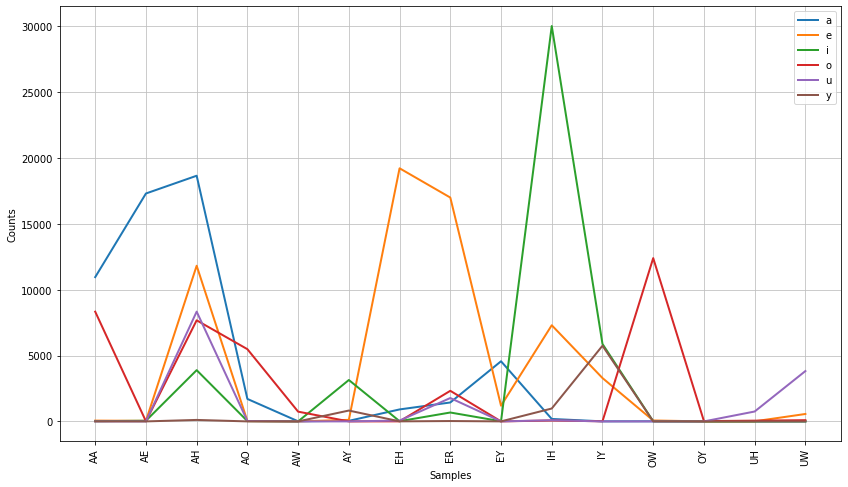

In [106]:
# This is not Python; it just tells the Jupyter Notebook to render the plot here
%matplotlib inline

# The following two lines adjust the size of the plot
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))

# Plotting the ConditionalFreqDist is similar to tabulating it
vowel_cfd.plot(conditions='aeiouy')

The `ConditionalFreqDist` contains absolute frequencies which means that frequently occurring vowels can drown out the data of infrequently occurring vowels. For instance, it can be hard to see the peaks of `u` and `y` because they are relatively less common than the other vowels in CMUdict. We can normalize the frequencies to make the peaks easier to see. One way to normalize is to divide each frequency within a condition by the sum of all frequencies within the condition. The result will tell us the percentage of occurrences of each vowel span that have some prununciation, rather than the absolute frequency of occurrences. This makes it easier to draw conclusions about individual vowels, but consequently loses information about relative frequencies (e.g., that `u` is less common than `e`).

Let's normalize the distribution and plot it again:

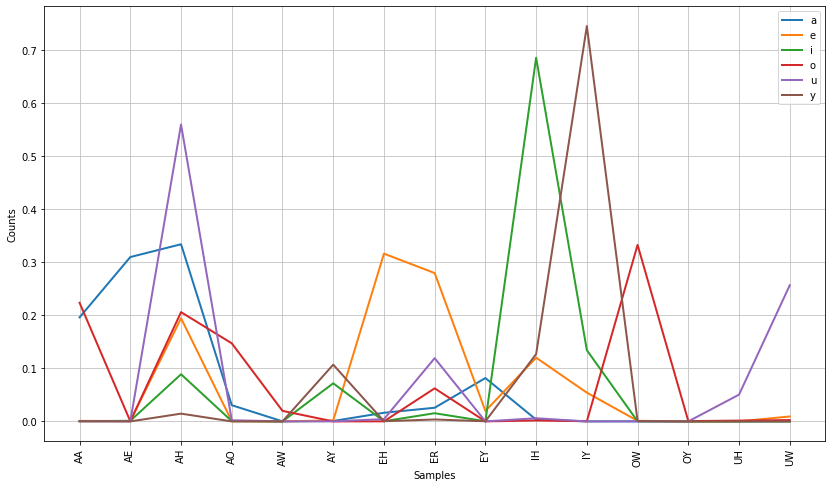

In [107]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))

# normalize vowel_cfd per condition
vowel_ncfd = nltk.ConditionalFreqDist()
for condition in vowel_cfd:
    condition_total = sum(vowel_cfd[condition].values())
    for key in vowel_cfd[condition]:
        vowel_ncfd[condition][key] = vowel_cfd[condition][key] / condition_total

# plot the normalized distribution
vowel_ncfd.plot(conditions='aeiouy')

Now with this normalized distribution, please answer the following questions:

What is the most frequent pronunciation for each of the 6 vowels `a`, `e`, `i`, `o`, `u`, and `y`?

The most frequent pronunciations are:

a AH
e EH
i IH
o OW
u AH
y IY

Some letters (such as `i`, `u`, and `y`) have one main high peak, while others (`a`, `e`, and `o`) have multiple low peaks. Why is that?

There is likely to be more (and therefore a higher percentage of) variation in the pronunciations of a, e and o as compared to i, u and y. A higher percentage of varying pronunciations means multiple low peaks, while the converse is also true, causing i, u and y to have one main high peak. 

Let's also look at which vowels have the most nonzero values. We can use `nltk.FreqDist` for this:

In [108]:
# The number of nonzeros for a vowel span is the length of the list of its nonzero counts
nonzeros = nltk.FreqDist()
for span in vowel_cfd:
    nonzeros[span] = sum([1 for frq in vowel_cfd[span].values() if frq > 0])

nonzeros.most_common(10)

[('a', 15),
 ('o', 15),
 ('e', 14),
 ('i', 12),
 ('u', 12),
 ('ue', 12),
 ('ai', 11),
 ('io', 11),
 ('ia', 10),
 ('eu', 10)]

All of the top-5 vowels here are the single-letter ones (except `y`), and all can be used with over half of the 19 possible vowel sounds (according to ARPABET). What does this tell you about English spelling? (e.g., consider how it would affect an automatic speech recognizer, or someone learning English as a second language, etc.)

English spelling is not very transparent, and many pronunciations can be mapped to one vowel, and vice versa. Since the rules governing vowel usage are unclear, it could be difficult for automatic speech recognizers or foreign language learners to recognise patterns or come up with generalisations that would be applicable to new words that they come across.

The `y` charater is sometimes a vowel, as in *fry*, *play*, or *happy*, but sometimes it is a consonant, as in *yes* (maybe *yeet*?) or *yoyo*. Look again at the conditions of `vowel_cfd` that contain a `y`:

In [109]:
[cond for cond in vowel_cfd.conditions() if 'y' in cond]

['ey',
 'y',
 'eya',
 'ay',
 'oy',
 'ya',
 'aye',
 'ye',
 'oya',
 'oye',
 'yo',
 'ayo',
 'yu',
 'eye',
 'yi',
 'ouy',
 'uye',
 'uy',
 'uey',
 'uay',
 'aey',
 'you',
 'oyo',
 'yee',
 'yea',
 'aya',
 'yeu',
 'yie',
 'yay',
 'eyea',
 'eay',
 'ayu',
 'uaye',
 'ayi',
 'yaa',
 'yae',
 'yao',
 'yau',
 'yei',
 'yeo',
 'yoa',
 'yoe',
 'yoo',
 'yoy',
 'yue',
 'yui']

Do you think all of these should each map to a single vowel sound? How might you alter the `vowel_spans()` function to more accurately separate `y` vowels from `y` consonants? (Don't write code, just answer in general terms)

No. I would maybe consider the position of the y in the word (i.e. whether it is word-initial/ word-final or neither), as well as the vowels adjacent to the y. For instance, y seems to be a vowel when it is word-final, and seems to be a consonant when it is followed by another vowel. 

Consider a word like *bird* which has the pronunciation `['B', 'ER1', 'D']` (recall that American English is rhotic). The method used above would map `i` to `ER` as `B`, `R`, and `D` are all listed as consonants. Similarly, syllabic consonants like `l` in *table*, `n` in *button*, and `m` in *rhythm* do not have any other vowel, but CMUdict inserts the `AH` vowel between them and the previous consonants (e.g., `['T', 'EY1', 'B', 'AH0', 'L']` for *table*).

What are some other strategies you might use to more accurately map orthographic spans to pronunciation segments?

Perhaps take into consideration the variety of English that is being studied and adjust parameters accordingly - for example, when studying American English, take into account the post-vocalic r and so consider any r preceded by a vowel to be a single unit with said vowel. A third intermediate category of semi-vowels can also be created in order to more accurately parse consonants that act like vowels.